# ¿Qué pasó en las elecciones?
HIPOTESIS NO. 1: EL FACTOR CHI

In [22]:
# Importar librerías
from elec_bol20.nb_2020.z100_mas_chi2019_mas2020_fun import *

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import display, HTML
# from plotly.graph_objs import *
# import numpy as np
# init_notebook_mode(connected=True)

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;    
}
</style>
"""))

Los resultados de las últimas elecciones presidenciales en Bolivia han generado mucha sorpresa en la población boliviana. Después de un reñido final en el referéndum de la re-postulación del binomio Evo-Álvaro el año 2016 y de las controversiales elecciones nacionales del 2019, las expectativas sobre los resultados de las elecciones del 2020 eran muy altas. El margen de diferencia en el resultado final de las elecciones 2020 ha llevado a algunas personas a levantar sospechas de fraude. A pesar de esto, un breve análisis comparativo entre los datos oficiales de la elección del 2020 y la elección del 2019 arrojan pistas interesantes que nos ayudan a entender mejor lo que pasó en las últimas elecciones. 

La primera hipótesis que trataremos aquí es la que hemos denominado como “el factor CHI”. En gran medida, hemos seguido la pista de lo señalado por información de encuestas electorales del 2019 en las cuales se consultó acerca de la segunda opción de preferencia de los votantes. En aquella ocasión, los votantes de Chi, respondieron que de no poder votar por su candidato, preferirían votar por Evo Morales y el MAS. Con ayuda de los datos de ambas elecciones hemos podido observar que una buena parte de la votación que el candidato Chi Hyun Chung obtuvo el año 2019 ha migrado al Movimiento al Socialismo.  

In [21]:
# Tabla 1
df = get_df()
pd.DataFrame(df[['VV_20','VV_19','HAB_20','HAB_19']].sum(),columns=['VOTANTES'])

VOTANTES
VV_20    5565388
VV_19    5682669
HAB_20   6625612
HAB_19   6757039

### Figura 1 
Diferencias entre 2020 y 2019 para (a) CHI, (b) MAS. Además, en (c): (MAS20-MAS19) + (CHI20-CHI19)

### hide

In [11]:
# Fig. 1
plot_3_comparison(df=df)

Loading BokehJS ...

### texto

La siguiente información es obtenida realizando un análisis de clusters. Este análisis nos ha permitido poder comparar el comportamiento de las mesas de votación entre el 2019 y el 2020. Hemos juntado en grupos llamados “clusters” a las mesas que tuvieron un comportamiento similar para poder realizar la comparación que deseábamos. En cada cluster hemos sacado la diferencia de votación que cada partido tuvo entre las elecciones del 2019 y las del 2020. Así, si el MAS hubiera obtenido 100% de votos en una mesa el año 2019 y 70% de votos en esa misma mesa el año 2020, tendríamos la diferencia 30%. Para aquellos partidos que participaron de las elecciones de 2019 pero no del 2020 la diferencia es del 100% y para los partidos que participaron de las elecciones del 2020 pero no en las del 2019 la diferencia es de 0%. Los resultados de ese análisis se ven así


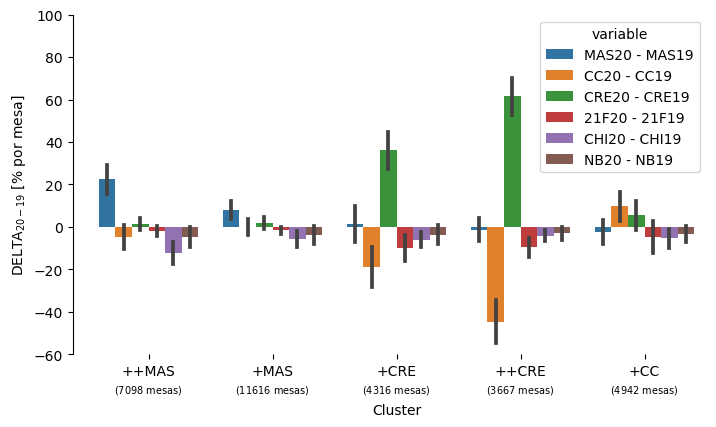

In [24]:
# Fig. 2
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
df1 = cluster_analysis(df=df)

nm_dic = df1.groupby(CLUS).count().iloc[:,0].to_dict()
nm_dic = {b:f'{b}\n$_{{({nm_dic[b]} \mathrm{{\ mesas}})}}$' for a,b in CLUS_DIC.items()}
mel = pd.melt(df1[[*COLUMNS_CLUS, CLUS]], id_vars=CLUS)
# mel[CLUS] = mel[CLUS].apply(lambda r: nm_dic[r])


mea = df1[[*COLUMNS_CLUS,CLUS]].groupby(CLUS).mean()
f, ax = plt.subplots(figsize=(8, 4.5), dpi=100)
sns.barplot(x=CLUS, y='value', data=mel, hue='variable',
            order=nm_dic.keys(), ci='sd');
ax.set_ylabel('$\mathrm{DELTA}_{20-19}$ [% por mesa]');

labs = ax.get_xticklabels()
labs = [matplotlib.text.Text(i.get_position(),text=nm_dic[i.get_text()]) for i in labs]
rr=ax.set_xticklabels(labs)
ax.set_ylim(-60,100)
sns.despine(ax=ax,offset=10,bottom=True)


In [25]:
# Tabla 2

mea['SUM'] = mea.sum(axis=1)
mea.round()

MAS20 - MAS19  CC20 - CC19  CRE20 - CRE19  21F20 - 21F19  \
Cluster                                                             
++CRE             -1.0        -45.0           61.0          -10.0   
++MAS             22.0         -5.0            1.0           -2.0   
+CC               -2.0         10.0            5.0           -5.0   
+CRE               2.0        -19.0           36.0          -10.0   
+MAS               8.0          0.0            2.0           -2.0   

         CHI20 - CHI19  NB20 - NB19  SUM  
Cluster                                   
++CRE             -4.0         -3.0 -1.0  
++MAS            -12.0         -5.0  0.0  
+CC               -5.0         -3.0 -1.0  
+CRE              -6.0         -4.0 -1.0  
+MAS              -6.0         -4.0 -1.0

En este gráfico podemos ver lo siguiente: por debajo de la línea de 0, podemos ver el porcentaje de los votos que se perdieron el 2019; y por encima de la línea de cero, podemos ver a dónde fueron a parar estos votos. Es así que podemos ver 5 casos interesantes. El primer caso es el del cluster 0. Aquí podemos ver que tanto la agrupación 21F como Chi y el Movimiento al Socialismo perdieron votos y estos fueron a parar a Comunidad Ciudadana y a Creemos. Sin embargo, por la altura de las barras, podemos ver que fueron muy pocos los votantes que decidieron dejar de votar por el MAS y decidieron darle su voto a Carlos Mesa o a Fernando Camacho. La mayoría son ex votantes de CHI o de 21F. Entonces, quienes se han desencantado con el MAS y decidieron dar su apoyo a CC o a Creemos sí existen, pero son casos excepcionales. 

En los siguientes clusters, podemos ver cuáles han sido los casos más comunes. En el cluster 1 y 4 podemos ver el caso de CC vs Creemos. En ambos casos vemos como antiguos votantes de CC, de 21F y de Chi, en ese orden, beneficiaron en mayor y abrumadora medida a Creemos y, en una pequeña minoría, al MAS. En los cluster 2 y 3 podemos ver el caso Chi vs MAS. En el cluster 2 vemos como un gran porcentaje de ex votantes de Chi, de CC y de 21F, en ese orden, beneficiaron abrumadoramente al MAS y en mucha menor medida a Creemos. Finalmente, en el cluster 3 vemos el mismo caso sin la participación de CC.

Resumiendo: ¿Cómo cambió el voto entre el 2019 al 2020? Principalmente, el 8.78% de votación que obtuvo Chi el 2019 fue abrumadoramente hacia el MAS y en menor medida a Creemos, y en mucha menor medida a CC. El segundo cambio evidente es que Creemos recogió la votación de la agrupación 21F, poco de la votación de Chi y menos aún de votantes del MAS, pero logró atraer a un importante porcentaje del voto de CC. Ahora veamos cómo se han distribuidos estas explicaciones en el mapa.

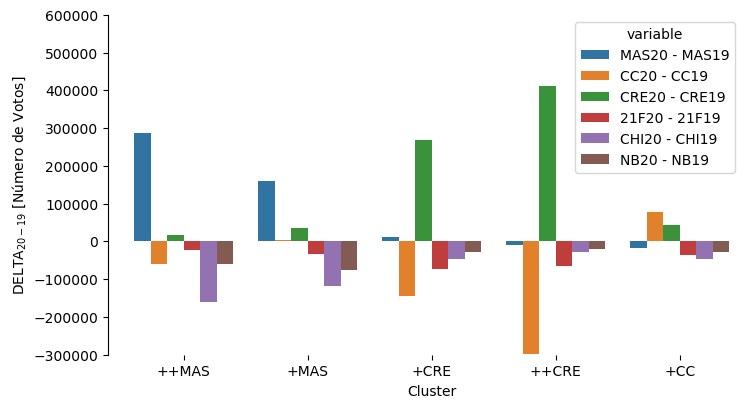

In [524]:
# Fig. 3 
ds = df1.copy()
ds[COLUMNS_CLUS] = df1[COLUMNS_CLUS].multiply(df1['VV_20'], axis=0) / 100

mel1 = pd.melt(ds[[*COLUMNS_CLUS, CLUS]], id_vars=CLUS)
mel1 = mel1.groupby([CLUS, 'variable']).sum()



# noinspection PyRedeclaration
f, ax = plt.subplots(figsize=(8, 4.5), dpi=100)
sns.barplot(x=CLUS, y='value', data=mel1.reset_index(), hue='variable',
            order=CLUS_DIC.values(), hue_order=COLUMNS_CLUS);
ax.set_ylabel('$\mathrm{DELTA}_{20-19}$ [Número de Votos]');

ax.set_ylim(-300000,600000)
sns.despine(ax=ax,offset=10,bottom=True)


In [525]:
# Tabla 3
tab=mel1.round().astype(int)
tab=tab.reset_index().set_index([CLUS,'variable']).unstack()
tab['value'].T

Cluster         ++CRE   ++MAS    +CC    +CRE    +MAS
variable                                            
21F20 - 21F19  -63982  -22997 -37000  -73901  -32884
CC20 - CC19   -299389  -59438  78941 -143127    3725
CHI20 - CHI19  -28071 -159182 -46573  -46078 -117846
CRE20 - CRE19  411399   16375  42663  269498   36207
MAS20 - MAS19   -8199  287621 -17441   12238  159103
NB20 - NB19    -20275  -59886 -28450  -26609  -75796

In [526]:
# Fig. 4
plot_clusters_carto(df1=df1);

El cluster 0, ese que nos mostraba a los electores que habían decidido dejar de votar por el MAS por 21F o por Chi, se encuentran representados en color rojo. Aquí podemos ver que se encuentran repartidos en todos los grandes centros urbanos del país. Todos, con la excepción de Santa Cruz. Pero recordemos que no son cambios muy grandes en términos cuantitativos, por lo que podemos concluir que, salvo en Santa Cruz, algunas personas de las ciudades decidieron apoyar a CC o Creemos en desmedro del 21F, Chi o del MAS. 

El caso de CC vs Creemos se ve en el mapa con los colores azul y amarillo. El color amarillo se encuentra en la ciudad de Santa Cruz y sus alrededores, aquí Creemos captó un gran número de votos de CC, 21F y algunos cuántos de Chi; mientras que algo parecido, pero con menor intensidad, sucedió en las áreas periurbanas de Santa Cruz y en algunos sectores de Pando y Beni.

El caso MAS vs Chi se ve en el mapa con los colores verde y morado. Los lugares donde la mayor cantidad de votos de Chi, CC y 21F migró mayoritariamente al MAS se encuentran en la ciudad de El Alto, zonas periurbanas de Cochabamba, Oruro, Potosí. Por otro lado, la migración del voto hacia el MAS en zonas periurbanas de Chuquisaca y del norte del departamento de Santa Cruz, se ha dado de forma menos intensa, esto puede verse en zonas pintadas de verde. Las zonas donde los votos de Chi migraron al MAS, pero sin afectar a CC, están en morado. Podemos ver que se trata de zonas rurales que rodean las principales ciudades. 

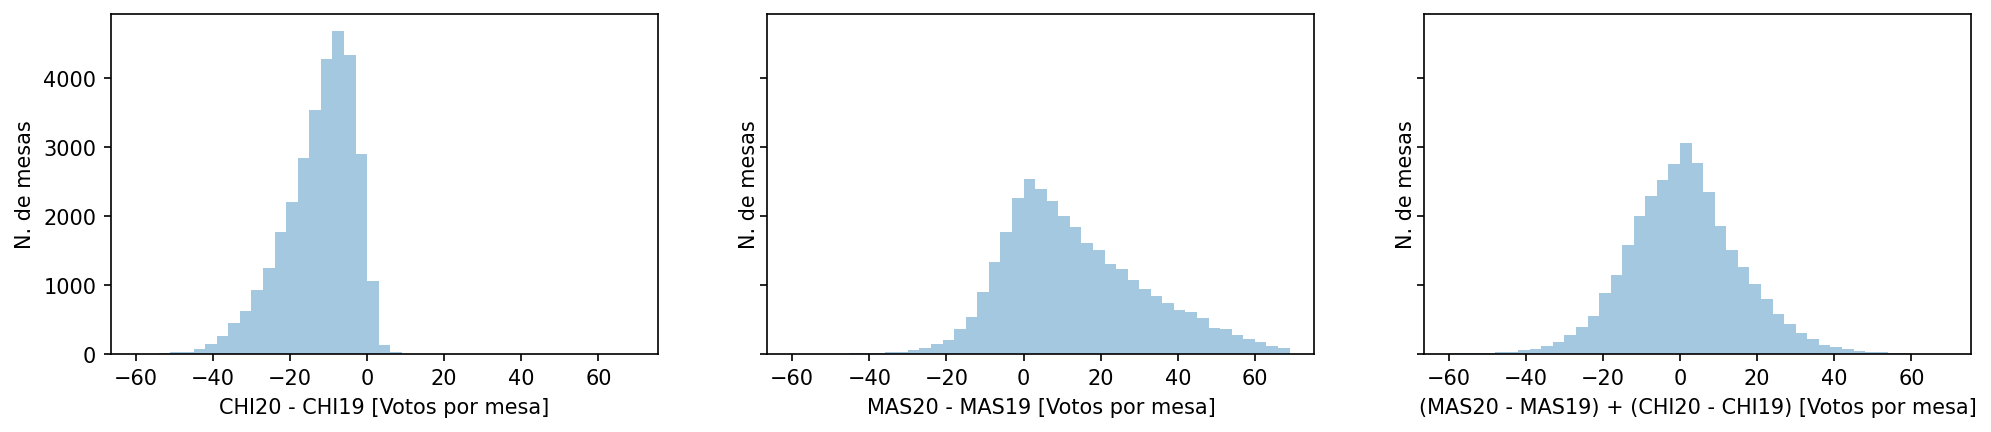

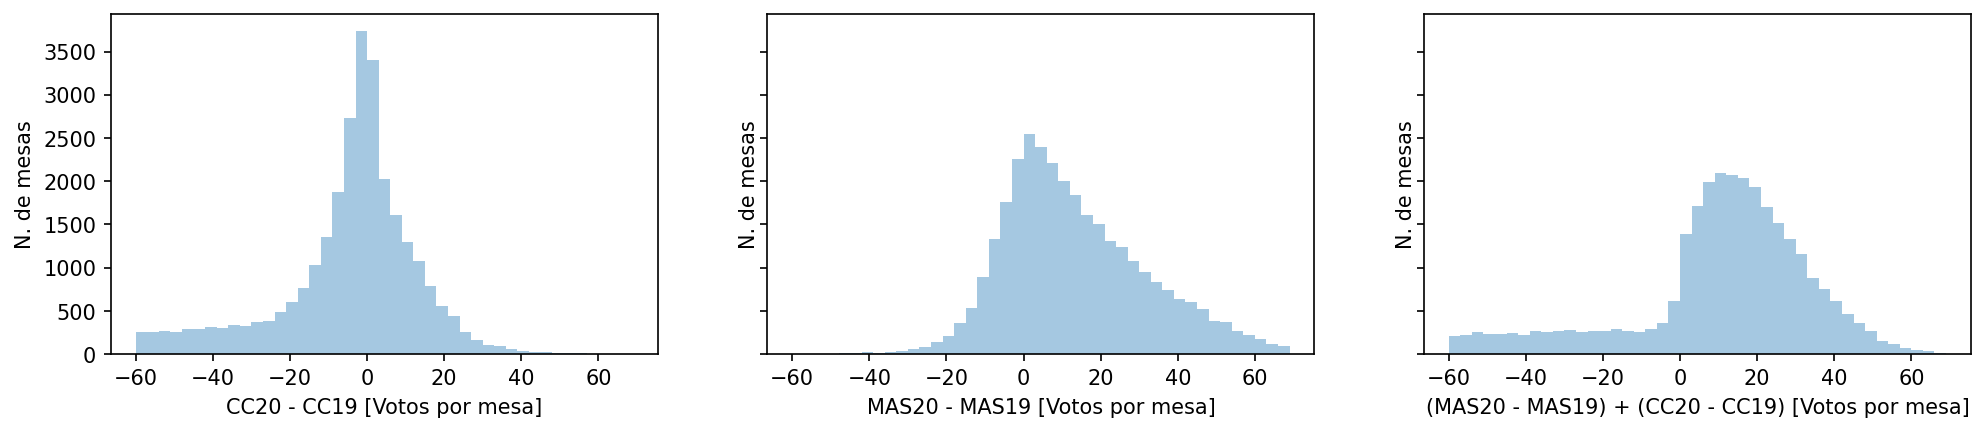

In [527]:
# Fig. 5 
((df[DMAS_M_DCHI]*df['VV_20']/100).mean()).round()

((df[DMAS]*df['VV_20']/100).mean()).round()

(df['VV_20']).mean()



import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pl_dic = {
    
    'A':{'a':DCHI,'b':DMAS,'c':DMAS_M_DCHI},
    'B':{'a':DCC,'b':DMAS,'c':DMAS_M_DCC},
#     'C':{'a':D21F,'b':DMAS,'c':DMAS_M_D21F},
}

for a,A in pl_dic.items():
    a = A['a']
    b = A['b']
    c = A['c']
    
    _df = df[[a,b,c,'VV_20']].dropna(how='any')


    
    
    
    # noinspection PyTypeChecker
    f, axs = plt.subplots(1, 3, figsize=[16, 3], sharex=True, sharey=True, dpi=150)
    axf = axs.flatten()
    def _pl(ax,a):
        bs = np.arange(-60,71,3)
        sns.distplot(_df[a]*_df['VV_20']/100, ax=ax,
#                      hist_kws={'weights':_df['HAB_20']*np.abs(_df[a])},
                     kde=False,
                    bins=bs)
        ax.set_ylabel('N. de mesas')
        ax.set_xlabel(ax.get_xlabel() + f'{a} [Votos por mesa]')
    _pl(axf[0],a)
    _pl(axf[1],b)
    _pl(axf[2],c)

Es así que en base a las encuestas para las elecciones 2020 resultaba evidente que la candidatura de Fernando Camacho y Marco Pumari significaron una significativa merma de votos para los candidatos de Comunidad Ciudadana. Aún así, este fenómeno no permite, por sí solo, explicar cómo el MAS logró subir tanto su porcentaje de votación en la reciente contienda electoral, sobre todo teniendo en cuenta que en el referéndum del 2016 el MAS obtuvo un 48.7% y que en las anteriores elecciones obtuvo un 47,08%. El dato final del cómputo 2020 dejó sorprendidos a analistas y estrategas, parece ser que en los análisis vertidos hasta ahora se han estado olvidando del factor Chi.

PD: En las gráficas podemos ver que los votos nulos y blancos también jugaron un rol importante, que debe ser explicado aparte. Esto será expuesto en un siguiente artículo. 